In [66]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import re
import emoji
import time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import utils
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
np.random.seed(500) 

# Importing data 

In [67]:
unprocessed_stocks = pd.read_csv("./data/stock_db.csv")
unprocessed_crypto = pd.read_csv("./data/crypto_db.csv")
unprocessed_stocks

,symbol,sentiment,message,message_id
0,AAPL,Bullish,$AAPL ain’t nobody selling. Shorts need to cov...,304543565
1,AAPL,Bullish,$QRVO today watch lists $CCIV $AAPL $RBLX,304543491
2,AAPL,Bullish,$AAPL could you imagine if we see $133+ by Fri...,304542855
3,AAPL,Bullish,$AAPL will revisit mid 126.xx\nWay too early i...,304542796
4,AAPL,Bullish,$AAPL \n\nBears are cocksuckers,304542546
...,...,...,...,...
291563,FB,Bullish,$FB I&#39;m excited about next week,19228876
291564,FB,Bullish,@flavisam_letstradeshares Agree re $fb,19228800
291565,FB,Bullish,$FB looking to test the 52w high at 58.96 (Jan9),19228632
291566,FB,Bullish,Recent sold $BBRY $IRWD $OREX $ACHN $LNKD $ANG...,19228264


In [68]:
print(len(unprocessed_stocks))
print(len(unprocessed_crypto))

291568
305974


# Visualizing the data

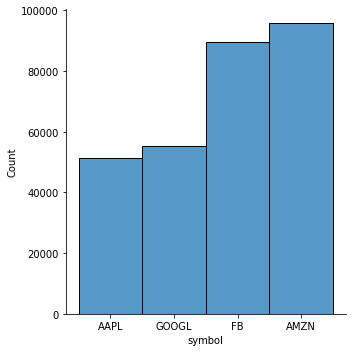

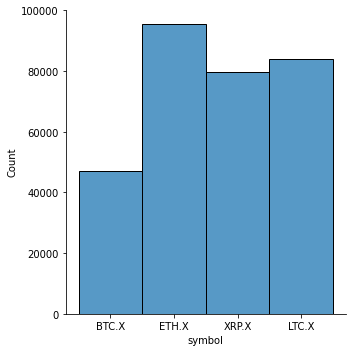

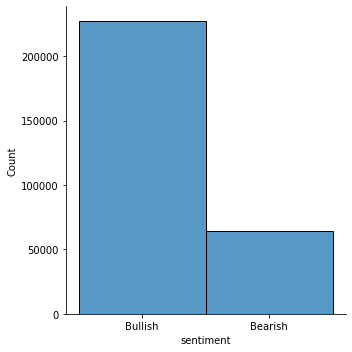

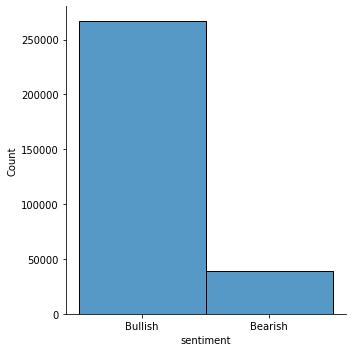

In [69]:
sns.displot(unprocessed_stocks, x="symbol")
sns.displot(unprocessed_crypto, x="symbol")
sns.displot(unprocessed_stocks, x="sentiment")
sns.displot(unprocessed_crypto, x="sentiment")

# Preprocessing
Here we define our preprocess function, one needs to specify which preprocessing functions he wants to be applied to the data messages



In [70]:
from preprocessing import preprocess

In [58]:
%%time
# temp = unprocessed_crypto[0:20]
preprocessed_crypto = preprocess(unprocessed_crypto, punc=True, lower=True, lemma=False, em_rep=False, num=False, stopw=False, misspell=False)
preprocessed_crypto


CPU times: user 1.87 s, sys: 20.8 ms, total: 1.89 s
Wall time: 1.91 s


,symbol,sentiment,message,message_id
0,BTC.X,Bullish,btcx go go you beautiful bastard,304543745
1,BTC.X,Bullish,zilx nio ssnlf ethx btcx httpsthefintechtime...,304543536
2,BTC.X,Bullish,btcx bitcoin is like real estate in palm beach...,304543059
3,BTC.X,Bearish,btcx dump city dump dump city,304542929
4,BTC.X,Bullish,aabb this baby about to riot mara fcel btcx,304542879
...,...,...,...,...
305969,ETH.X,Bullish,ethx heard a lot of quotcup and handlequot ear...,93993562
305970,ETH.X,Bullish,kmdx ethx ethereum reversing and komodo coin h...,93993304
305971,ETH.X,Bullish,ltcx btcx ethx heading uppppp,93992405
305972,ETH.X,Bullish,bchx btcx ethx ltcx woo hoo we are rocking,93992251


In [59]:
%%time
preprocessed_stock = preprocess(unprocessed_stocks, punc=False, lower=False, lemma=False, em_rep=False, num=False, stopw=False, misspell=False)
preprocessed_stock


CPU times: user 195 ms, sys: 5.61 ms, total: 200 ms
Wall time: 210 ms


,symbol,sentiment,message,message_id
0,AAPL,Bullish,$AAPL ain’t nobody selling. Shorts need to cov...,304543565
1,AAPL,Bullish,$QRVO today watch lists $CCIV $AAPL $RBLX,304543491
2,AAPL,Bullish,$AAPL could you imagine if we see $133+ by Fri...,304542855
3,AAPL,Bullish,$AAPL will revisit mid 126.xx Way too early in...,304542796
4,AAPL,Bullish,$AAPL Bears are cocksuckers,304542546
...,...,...,...,...
291563,FB,Bullish,$FB I&#39;m excited about next week,19228876
291564,FB,Bullish,@flavisam_letstradeshares Agree re $fb,19228800
291565,FB,Bullish,$FB looking to test the 52w high at 58.96 (Jan9),19228632
291566,FB,Bullish,Recent sold $BBRY $IRWD $OREX $ACHN $LNKD $ANG...,19228264


In [60]:
all_processed = pd.concat([preprocessed_crypto, preprocessed_stock], ignore_index=True)
all_processed

,symbol,sentiment,message,message_id
0,BTC.X,Bullish,btcx go go you beautiful bastard,304543745
1,BTC.X,Bullish,zilx nio ssnlf ethx btcx httpsthefintechtime...,304543536
2,BTC.X,Bullish,btcx bitcoin is like real estate in palm beach...,304543059
3,BTC.X,Bearish,btcx dump city dump dump city,304542929
4,BTC.X,Bullish,aabb this baby about to riot mara fcel btcx,304542879
...,...,...,...,...
597537,FB,Bullish,$FB I&#39;m excited about next week,19228876
597538,FB,Bullish,@flavisam_letstradeshares Agree re $fb,19228800
597539,FB,Bullish,$FB looking to test the 52w high at 58.96 (Jan9),19228632
597540,FB,Bullish,Recent sold $BBRY $IRWD $OREX $ACHN $LNKD $ANG...,19228264


In [61]:
all_processed['sentiment'].value_counts()

Bullish    494034
Bearish    103508
Name: sentiment, dtype: int64

In [62]:
balanced_processed = all_processed.groupby('sentiment').apply(lambda x:x.sample(103508)).reset_index(drop=True)
print(balanced_processed['sentiment'].value_counts())


Bullish    103508
Bearish    103508
Name: sentiment, dtype: int64


In [63]:
X_train, X_test, y_train, y_test = train_test_split(balanced_processed['message'], balanced_processed['sentiment'], test_size=0.3, random_state=500, stratify=balanced_processed['sentiment'])



In [64]:
%%time
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(X_train)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

CPU times: user 6.63 s, sys: 113 ms, total: 6.74 s
Wall time: 6.76 s


# Naive Bayes

MNB Accuracy Score->  76.8134610739876
CPU times: user 1.23 s, sys: 11.9 ms, total: 1.24 s
Wall time: 1.25 s


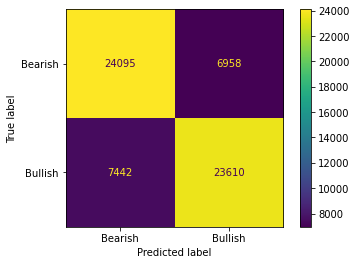

In [65]:
%%time
MNB = MultinomialNB()
MNB.fit(Train_X_Tfidf,y_train)
predictions_MNB = MNB.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("MNB Accuracy Score-> ",accuracy_score(predictions_MNB, y_test)*100)
plot_confusion_matrix(MNB, Test_X_Tfidf, y_test)  

# SVC

In [ ]:
# %%time
# # Classifier - Algorithm - SVM
# # fit the training dataset on the classifier
# SVM = svm.SVC()
# SVM.fit(Train_X_Tfidf,y_train)
# predictions_SVM = SVM.predict(Test_X_Tfidf)
# # Use accuracy_score function to get the accuracy
# print("SVM Accuracy Score-> ",accuracy_score(predictions_SVM, y_test)*100)

# Logistic Regression

# XGBoost

# Fast Textt